In [1]:
import getdata as data
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
from datetime import date, timedelta

zone = "SE3"

yesterday = date.today() - timedelta(days=1)

spotprice = data.get_spotprice(zone)




In [2]:

pprint(spotprice)


rows = spotprice["areas"]["SE3"]["values"]
spotprice = pd.DataFrame(rows)
spotprice["start"] = pd.to_datetime(spotprice["start"])
spotprice["end"] = pd.to_datetime(spotprice["end"])






{'areas': {'SE3': {'values': [{'end': datetime.datetime(2025, 12, 7, 0, 0, tzinfo=tzutc()),
                               'start': datetime.datetime(2025, 12, 6, 23, 0, tzinfo=tzutc()),
                               'value': 26.02},
                              {'end': datetime.datetime(2025, 12, 7, 1, 0, tzinfo=tzutc()),
                               'start': datetime.datetime(2025, 12, 7, 0, 0, tzinfo=tzutc()),
                               'value': 25.01},
                              {'end': datetime.datetime(2025, 12, 7, 2, 0, tzinfo=tzutc()),
                               'start': datetime.datetime(2025, 12, 7, 1, 0, tzinfo=tzutc()),
                               'value': 23.58},
                              {'end': datetime.datetime(2025, 12, 7, 3, 0, tzinfo=tzutc()),
                               'start': datetime.datetime(2025, 12, 7, 2, 0, tzinfo=tzutc()),
                               'value': 22.58},
                              {'end': datetime.datetime(2025, 1

In [3]:
irradiance = data.get_irradiance()

pprint(irradiance)

rows = irradiance["value"]

irradiance = pd.DataFrame(rows)

# Convert SMHI timestamp (ms → seconds → datetime)
irradiance["timestamp"] = pd.to_datetime(irradiance["date"], unit="ms", utc=True)


irradiance["value"] = irradiance["value"].astype(float)
irradiance = irradiance[["timestamp", "value", "quality"]]

irradiance = irradiance[irradiance["timestamp"].dt.date == yesterday]


{'link': [{'href': 'https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/11/station/98735/period/latest-months/data.json',
           'rel': 'data',
           'type': 'application/json'},
          {'href': 'https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/11/station/98735/period/latest-months/data.xml',
           'rel': 'data',
           'type': 'application/xml'},
          {'href': 'https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/11/station/98735/period/latest-months/data.csv',
           'rel': 'data',
           'type': 'text/plain'},
          {'href': 'https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/11/station/98735/period/latest-months.atom',
           'rel': 'period',
           'type': 'application/atom+xml'},
          {'href': 'https://opendata-catalog.smhi.se/md/25080190-38ba-4279-a65d-d9ef8d0bf949',
           'rel': 'iso19139',
           'type': 'application/vnd.iso.19139+xml'},
          {'href':

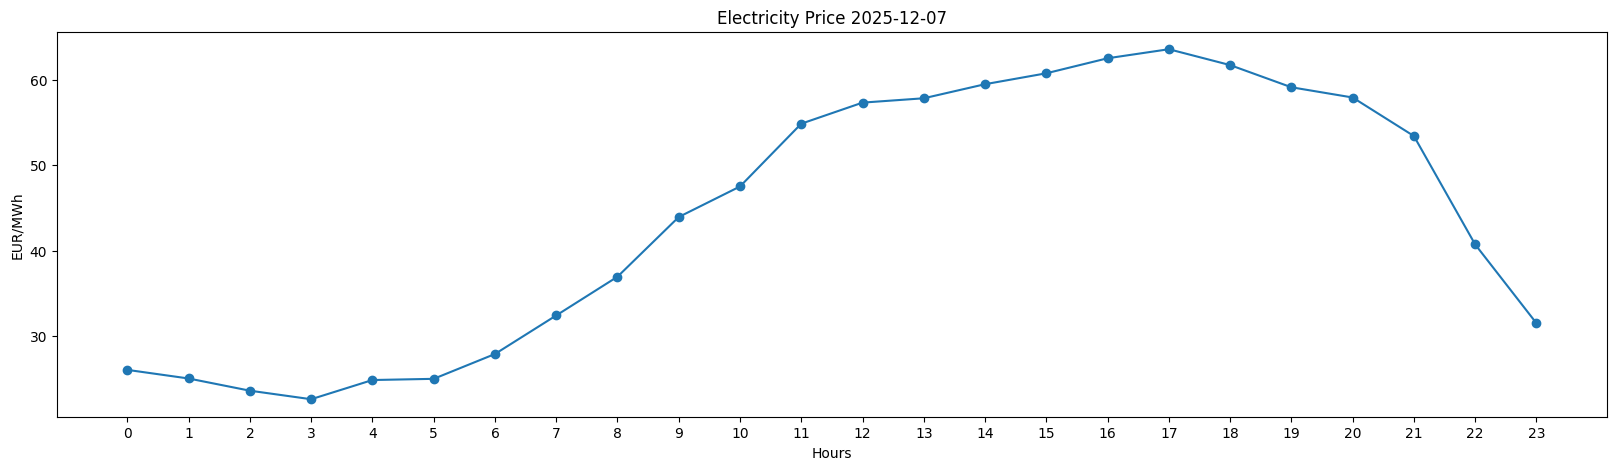

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(spotprice["end"].dt.hour,spotprice["value"], '-o')

plt.xticks(range(24))

plt.title(f"Electricity Price {spotprice["end"].dt.date.iloc[0]}")
plt.xlabel("Hours")
plt.ylabel("EUR/MWh")
plt.show()

In [5]:
print(irradiance)

                     timestamp  value quality
3095 2025-12-07 00:00:00+00:00   0.00       G
3096 2025-12-07 01:00:00+00:00   0.00       G
3097 2025-12-07 02:00:00+00:00   0.00       G
3098 2025-12-07 03:00:00+00:00   0.00       G
3099 2025-12-07 04:00:00+00:00   0.00       G
3100 2025-12-07 05:00:00+00:00   0.00       G
3101 2025-12-07 06:00:00+00:00   0.00       G
3102 2025-12-07 07:00:00+00:00   0.01       G
3103 2025-12-07 08:00:00+00:00   0.98       G
3104 2025-12-07 09:00:00+00:00  10.32       G
3105 2025-12-07 10:00:00+00:00  13.77       G
3106 2025-12-07 11:00:00+00:00  25.83       G
3107 2025-12-07 12:00:00+00:00  19.65       G
3108 2025-12-07 13:00:00+00:00  17.59       G
3109 2025-12-07 14:00:00+00:00   4.82       G
3110 2025-12-07 15:00:00+00:00   0.00       G
3111 2025-12-07 16:00:00+00:00   0.00       G
3112 2025-12-07 17:00:00+00:00   0.00       G
3113 2025-12-07 18:00:00+00:00   0.00       G
3114 2025-12-07 19:00:00+00:00   0.00       G
3115 2025-12-07 20:00:00+00:00   0

2025-12-07 23:00:00+00:00


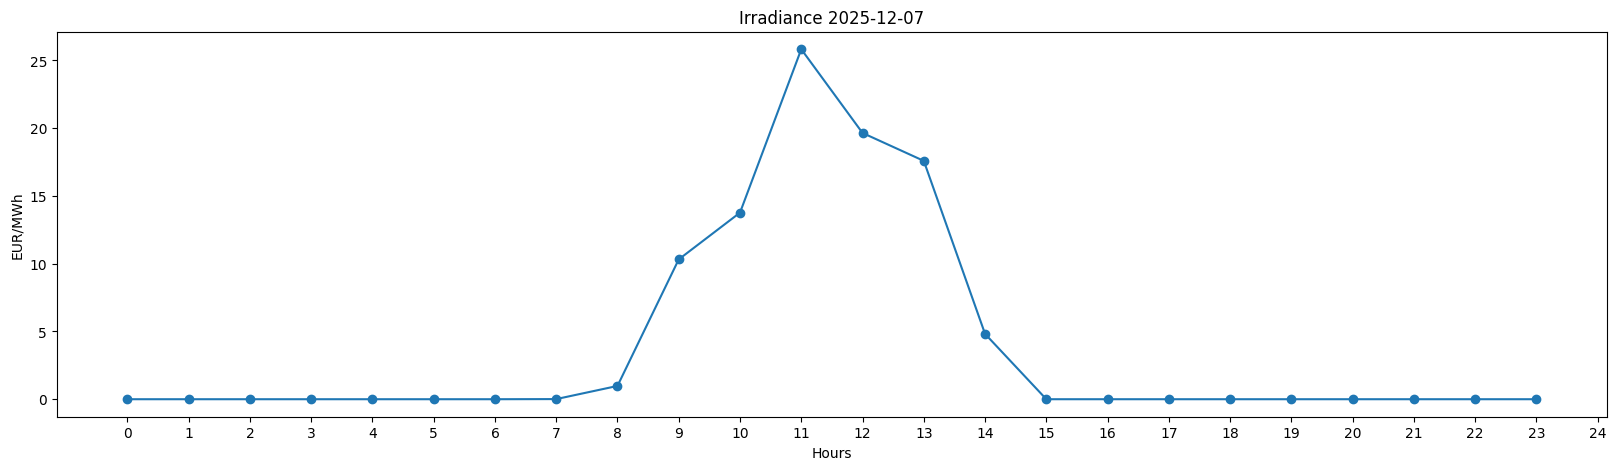

In [6]:


print(irradiance["timestamp"].iloc[-1])

plt.figure(figsize=(20, 5))
plt.plot(irradiance["timestamp"].dt.hour,irradiance["value"], '-o')

plt.xticks(range(25))
plt.title(f"Irradiance {irradiance["timestamp"].dt.date.iloc[0]}")
plt.xlabel("Hours")
plt.ylabel("EUR/MWh")
plt.show()

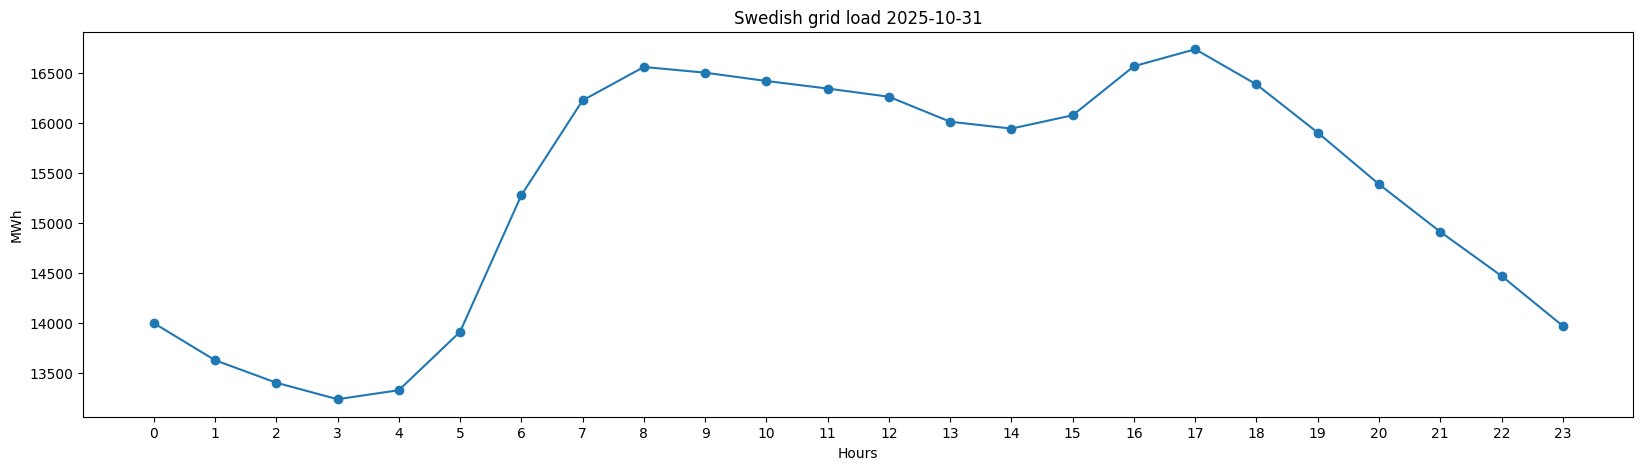

In [7]:
file_name = "n_fot2025-01-10.xls" # path to file + file name

df = pd.read_excel(file_name)

load = df.iloc[:, 0:2].tail(24)
load.columns = ["time", "value"]
load["time"] = pd.to_datetime(load["time"])

plt.figure(figsize=(20, 5))
plt.plot(load["time"].dt.hour,-1*load["value"], '-o')

plt.xticks(range(24))

plt.title(f"Swedish grid load {load["time"].dt.date.iloc[0]}")
plt.xlabel("Hours")
plt.ylabel("MWh")
plt.show()

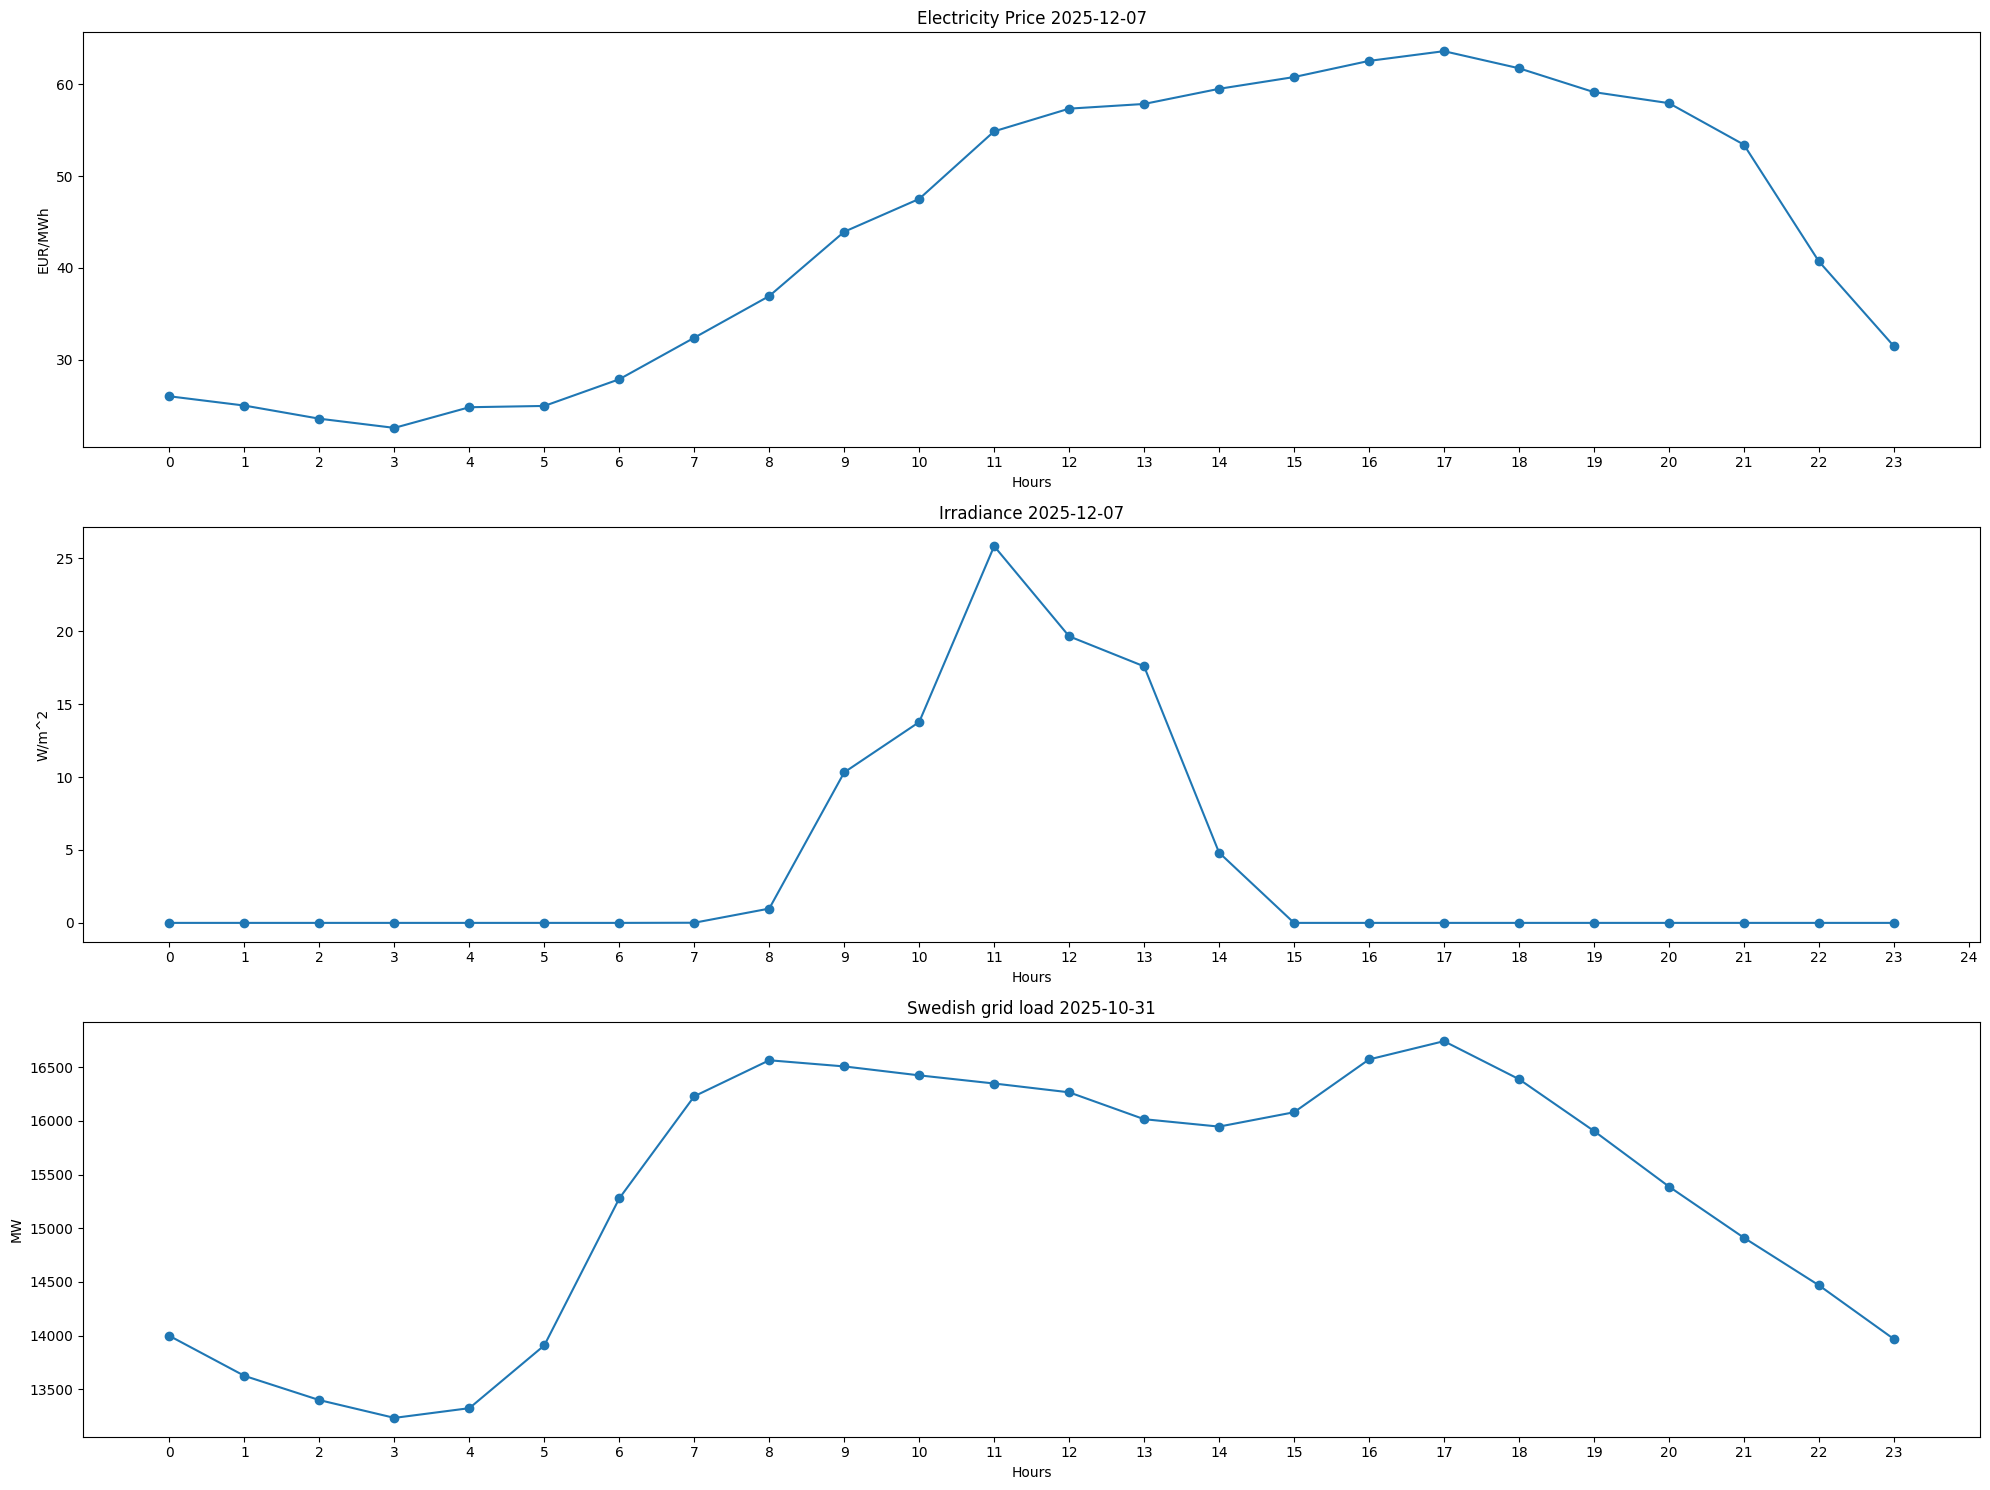

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))



# Example plots
axes[0].plot(spotprice["end"].dt.hour,spotprice["value"], '-o')
axes[0].set_title(f"Electricity Price {spotprice["end"].dt.date.iloc[0]}")
axes[0].set_xlabel("Hours")
axes[0].set_ylabel("EUR/MWh")
axes[0].set_xticks(range(24))

axes[1].plot(irradiance["timestamp"].dt.hour,irradiance["value"], '-o')

axes[1].set_xticks(range(25))
axes[1].set_title(f"Irradiance {irradiance["timestamp"].dt.date.iloc[0]}")
axes[1].set_xlabel("Hours")
axes[1].set_ylabel("W/m^2")

axes[2].plot(load["time"].dt.hour,-1*load["value"], '-o')
axes[2].set_xticks(range(24))
axes[2].set_title(f"Swedish grid load {load["time"].dt.date.iloc[0]}")
axes[2].set_xlabel("Hours")
axes[2].set_ylabel("MW")


plt.tight_layout()
plt.show()